In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import normalizar_datos

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test = normalizar_datos(X_train, X_test)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.88      0.91      0.90      6159
   Tiene Alto Valor Adquisitivo       0.70      0.63      0.66      1982

                       accuracy                           0.84      8141
                      macro avg       0.79      0.77      0.78      8141
                   weighted avg       0.84      0.84      0.84      8141



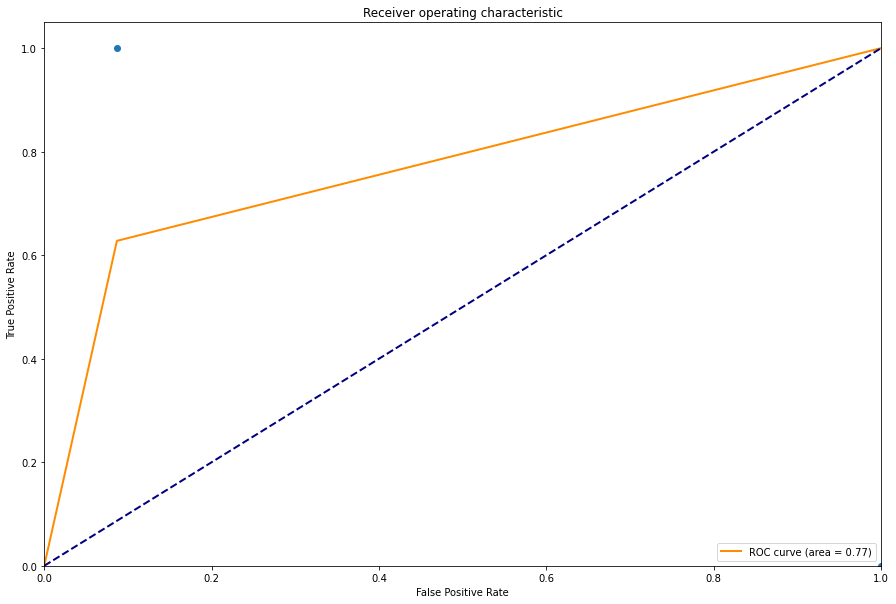

0.7703920443923875

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

# Busqueda de hiperparametros

In [8]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    y_array=np.array(y)
    for distancia in ['uniform', 'distance']:
        for metrica in ['minkowski','cosine','chebyshev','correlation']:
            for k in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]: 
                kf = StratifiedKFold(n_splits=5)
                metricas_de_la_combinacion = []
                for fold_index, (train_index, test_index) in enumerate(kf.split(X, y_array)):
                    print(k)
                    train_fold_actual = X.iloc[train_index].copy()
                    test_fold_actual = X.iloc[test_index].copy()
                    train_fold_actual, test_fold_actual = normalizar_datos(train_fold_actual, test_fold_actual)
                    knn = KNeighborsClassifier(n_neighbors=k, weights=distancia, metric=metrica)
                    knn.fit(train_fold_actual, y.iloc[train_index])
                    y_pred = knn.predict(test_fold_actual)
                    metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                    print(roc_auc_score(y.iloc[test_index], y_pred))
                        
                print(f"Promedio de la combinación: {np.mean(metricas_de_la_combinacion)}")
                metrics.append((k, distancia, metrica, np.mean(metricas_de_la_combinacion)))
                    
    df_metrics = pd.DataFrame(metrics, columns = ['cant_vecinos', 'distancia', 'metrica', 'rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]
    return mejor_combinacion

In [9]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

2
0.723236965292345
2
0.7153527673205204
2
0.7279520424674724
2
0.717320726834423
2
0.7329539825638994
Promedio de la combinación: 0.7233632968957321
3
0.7622343478314677
3
0.7750004127864738
3
0.7765782890826235
3
0.7612959018558879
3
0.7758796479756952
Promedio de la combinación: 0.7701977199064296
4
0.7364611758772827
4
0.7460733686678555
4
0.7501640826233406
4
0.7422158790700747
4
0.749596501221848
Promedio de la combinación: 0.7449022014920803
5
0.7664418929873087
5
0.7760674658212801
5
0.78741393402021
5
0.7711129961693416
5
0.7828650270787927
Promedio de la combinación: 0.7767802632153866
6
0.7468915718378535
6
0.7556242157056997
6
0.7645754903903309
6
0.7475511442441054
6
0.7557872663628559
Promedio de la combinación: 0.7540859377081691
7
0.7735728108930925
7
0.7732058235915725
7
0.7834326084802853
7
0.7715340383726307
7
0.7754142312264711
Promedio de la combinación: 0.7754319025128105
8
0.7543527662786885
8
0.7592247457235322
8
0.7619305610593753
8
0.7501950416088766
8
0.75915

0.7146118156000264
4
0.7250026831120798
Promedio de la combinación: 0.7142050879318851
5
0.7437897182671542
5
0.7470547685093455
5
0.746299369262268
5
0.752686207978337
5
0.7591721154481209
Promedio de la combinación: 0.749800435893045
6
0.7257258348957658
6
0.7242472838650023
6
0.7184992322171587
6
0.7282141618783435
6
0.7373532544085595
Promedio de la combinación: 0.726807953452966
7
0.7459535323346141
7
0.7430889224621886
7
0.7439980846707615
7
0.7558130655174692
7
0.7585591275345089
Promedio de la combinación: 0.7494825465039086
8
0.7333034382792825
8
0.7299870797833696
8
0.7287105376131034
8
0.7373604781718512
8
0.7405647331748233
Promedio de la combinación: 0.7339852534044861
9
0.7467720689697848
9
0.7480433921141271
9
0.7477781768047024
9
0.7587923518922132
9
0.7578821577174559
Promedio de la combinación: 0.7518536294996567
10
0.7319276083337974
10
0.7280191202694669
10
0.73059284393369
10
0.7399032428505382
10
0.7433252427184465
Promedio de la combinación: 0.7347536116211877
15

0.7303895406758372
7
0.7195642213195959
7
0.7277539049600423
7
0.7216714962684103
7
0.7208789462386896
Promedio de la combinación: 0.724051621892515
8
0.721302295073852
8
0.714566409087907
8
0.7228644491777293
8
0.7129328066177928
8
0.7191318274882769
Promedio de la combinación: 0.7181595574891116
9
0.7297769434492318
9
0.7219841820223235
9
0.7347465078264316
9
0.7250408658609074
9
0.7267363863020937
Promedio de la combinación: 0.7276569770921976
10
0.7223136219346934
10
0.717638572419259
10
0.7219470312396803
10
0.7116810316359553
10
0.7201348986196421
Promedio de la combinación: 0.718743031169846
15
0.7260155036601137
15
0.7285495508883165
15
0.7357743461462254
15
0.7254928670497326
15
0.7303224687933426
Promedio de la combinación: 0.7292309473075462
20
0.7224584563168674
20
0.7268705419060829
20
0.7298797553001783
20
0.7182918070140678
20
0.7237983785747308
Promedio de la combinación: 0.7242597878223854
25
0.7252006410613401
25
0.7301676738656627
25
0.7356350307113136
25
0.723781867

In [10]:
parametros_knn = mejor_combinacion.loc[:].values[0]
knn = KNeighborsClassifier(n_neighbors=parametros_knn[0], weights=parametros_knn[1], metric=parametros_knn[2])
knn.fit(X_train, y_train)

KNeighborsClassifier()

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.88      0.91      0.90      6159
   Tiene Alto Valor Adquisitivo       0.70      0.63      0.66      1982

                       accuracy                           0.84      8141
                      macro avg       0.79      0.77      0.78      8141
                   weighted avg       0.84      0.84      0.84      8141



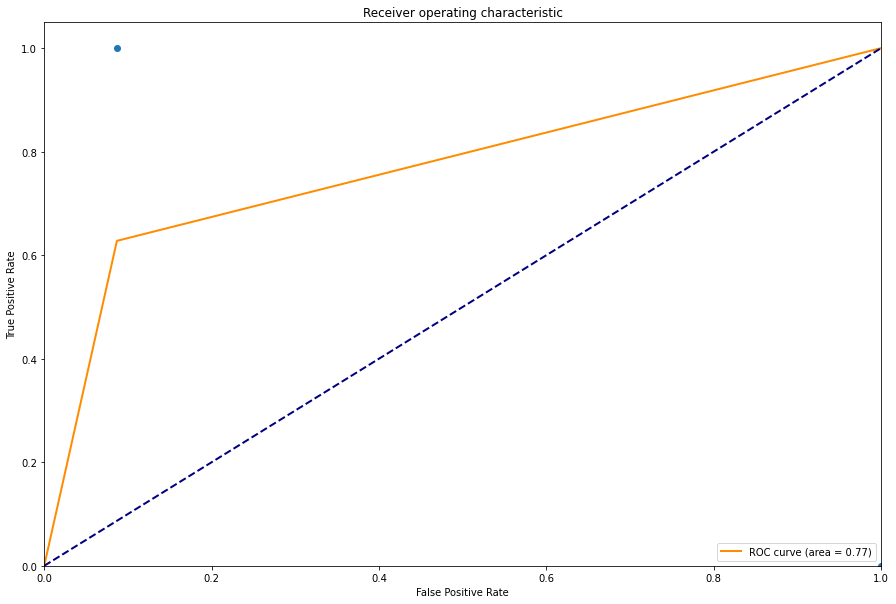

0.7703920443923875

In [12]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)